In [36]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import os
from env import host, user, password
import warnings
warnings.filterwarnings("ignore")
import wrangle

In [37]:
df = wrangle.wrangle_telco()
df.tenure.astype(float)
df.head()

,customer_id,monthly_charges,tenure,total_charges
0,0013-SMEOE,109.70,71,7904.25
1,0014-BMAQU,84.65,63,5377.8
2,0016-QLJIS,90.45,65,5957.9
3,0017-DINOC,45.20,54,2460.55
4,0017-IUDMW,116.80,72,8456.75


In [38]:
train_and_validate, test = train_test_split(df, random_state=123)
train, validate = train_test_split(train_and_validate)

In [39]:
train

,customer_id,monthly_charges,tenure,total_charges
314,1970-KKFWL,23.30,35,797.1
151,0885-HMGPY,69.40,62,4237.5
39,0270-THENM,69.85,72,5102.35
1377,8148-WOCMK,19.60,8,125
567,3458-IDMFK,20.75,25,499.4
...,...,...,...,...
1170,6976-BWGLQ,25.20,72,1787.35
305,1927-QEWMY,20.50,72,1502.25
1657,9788-HNGUT,116.95,72,8594.4
1316,7771-CFQRQ,63.80,47,3007.25


In [40]:
scaler = sklearn.preprocessing.MinMaxScaler()

scaler.fit(train[['monthly_charges']])

train['monthly_charges_scaled'] = scaler.transform(train[['monthly_charges']])
validate['monthly_charges_scaled'] = scaler.transform(validate[['monthly_charges']])
test['monthly_charges_scaled'] = scaler.transform(test[['monthly_charges']])

In [41]:
train.head()

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_scaled
314,1970-KKFWL,23.30,35,797.1,0.048878
151,0885-HMGPY,69.40,62,4237.5,0.508728
39,0270-THENM,69.85,72,5102.35,0.513217
1377,8148-WOCMK,19.60,8,125,0.011970
567,3458-IDMFK,20.75,25,499.4,0.023441


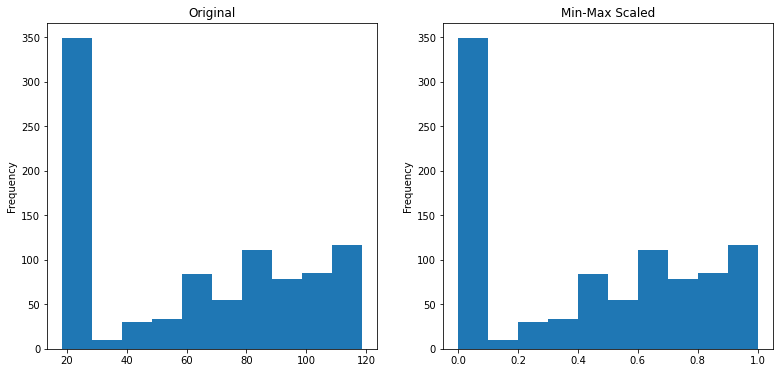

In [42]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.monthly_charges.plot.hist(title='Original')
plt.subplot(122)
train.monthly_charges_scaled.plot.hist(title='Min-Max Scaled')

In [43]:
scaler = sklearn.preprocessing.StandardScaler()

scaler.fit(train[['monthly_charges']])

train['monthly_charges_scaled'] = scaler.transform(train[['monthly_charges']])
validate['monthly_charges_scaled'] = scaler.transform(validate[['monthly_charges']])
test['monthly_charges_scaled'] = scaler.transform(test[['monthly_charges']])

In [44]:
train

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_scaled
314,1970-KKFWL,23.30,35,797.1,-1.092576
151,0885-HMGPY,69.40,62,4237.5,0.222282
39,0270-THENM,69.85,72,5102.35,0.235117
1377,8148-WOCMK,19.60,8,125,-1.198107
567,3458-IDMFK,20.75,25,499.4,-1.165307
...,...,...,...,...,...
1170,6976-BWGLQ,25.20,72,1787.35,-1.038385
305,1927-QEWMY,20.50,72,1502.25,-1.172437
1657,9788-HNGUT,116.95,72,8594.4,1.578497
1316,7771-CFQRQ,63.80,47,3007.25,0.062560


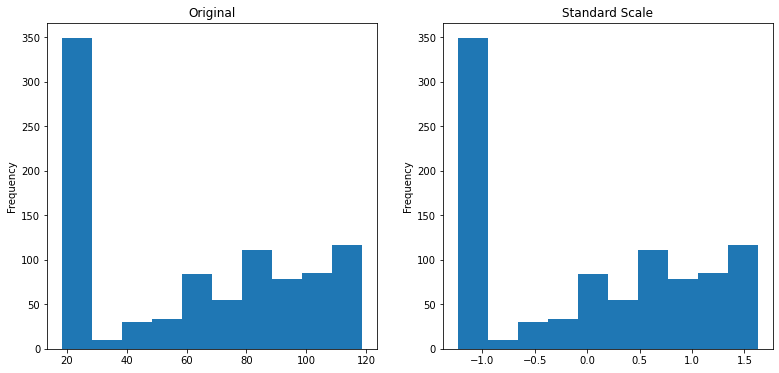

In [45]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.monthly_charges.plot.hist(title='Original')
plt.subplot(122)
train.monthly_charges_scaled.plot.hist(title='Standard Scale')

In [46]:
scaler = sklearn.preprocessing.StandardScaler()

scaler.fit(train[['monthly_charges']])

train['monthly_charges_inverse'] = scaler.inverse_transform(train[['monthly_charges_scaled']])
validate['monthly_charges_inverse'] = scaler.inverse_transform(validate[['monthly_charges_scaled']])
test['monthly_charges_inverse'] = scaler.inverse_transform(test[['monthly_charges_scaled']])

In [47]:
train.head()

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_scaled,monthly_charges_inverse
314,1970-KKFWL,23.30,35,797.1,-1.092576,23.30
151,0885-HMGPY,69.40,62,4237.5,0.222282,69.40
39,0270-THENM,69.85,72,5102.35,0.235117,69.85
1377,8148-WOCMK,19.60,8,125,-1.198107,19.60
567,3458-IDMFK,20.75,25,499.4,-1.165307,20.75


In [48]:
scaler = sklearn.preprocessing.QuantileTransformer(output_distribution='normal')

scaler.fit(train[['monthly_charges']])

train['monthly_charges_scaled'] = scaler.transform(train[['monthly_charges']])
validate['monthly_charges_scaled'] = scaler.transform(validate[['monthly_charges']])
test['monthly_charges_scaled'] = scaler.transform(test[['monthly_charges']])

In [49]:
train.head()

,customer_id,monthly_charges,tenure,total_charges,monthly_charges_scaled,monthly_charges_inverse
314,1970-KKFWL,23.30,35,797.1,-0.697813,23.30
151,0885-HMGPY,69.40,62,4237.5,0.097576,69.40
39,0270-THENM,69.85,72,5102.35,0.106840,69.85
1377,8148-WOCMK,19.60,8,125,-1.521433,19.60
567,3458-IDMFK,20.75,25,499.4,-0.750870,20.75


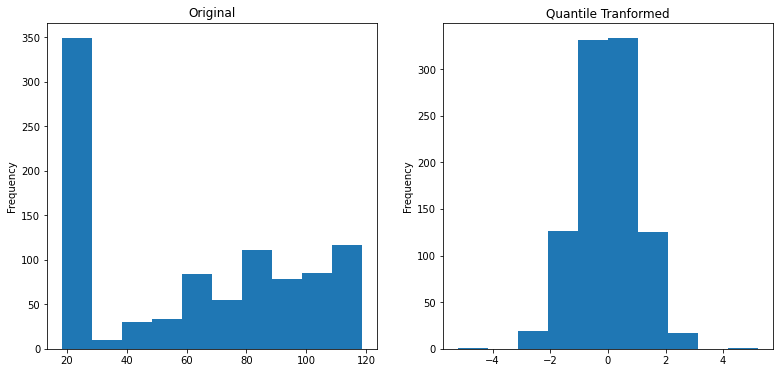

In [50]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.monthly_charges.plot.hist(title='Original')
plt.subplot(122)
train.monthly_charges_scaled.plot.hist(title='Quantile Tranformed')

In [51]:
scaler = sklearn.preprocessing.QuantileTransformer()

scaler.fit(train[['monthly_charges']])

train['monthly_charges_scaled'] = scaler.transform(train[['monthly_charges']])
validate['monthly_charges_scaled'] = scaler.transform(validate[['monthly_charges']])
test['monthly_charges_scaled'] = scaler.transform(test[['monthly_charges']])

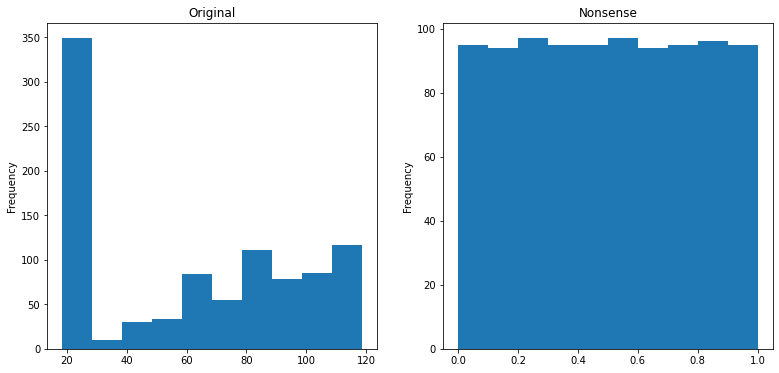

In [52]:
plt.figure(figsize=(13, 6))
plt.subplot(121)
train.monthly_charges.plot.hist(title='Original')
plt.subplot(122)
train.monthly_charges_scaled.plot.hist(title='Nonsense')